In [ ]:
import string
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('review_kopken.xlsx')
df

,userName,score,at,content,sentimen
0,Sar Jonitea,4,2024-05-22 20:07:00,Mantap,Positif
1,putri febiani,5,2024-05-22 14:51:00,Mantap dah,Positif
2,Amri Wardana,5,2024-05-22 13:24:00,Kopinya enaaakk,Positif
3,Lena Miru,5,2024-05-22 12:01:00,Kopinya Enak bedah skali dengan kopi yg lain.,Positif
4,Dasmanta Putra,3,2024-05-22 11:09:00,adain lg promo nya dgn bayar tunai via aplikasi.,Positif
...,...,...,...,...,...
194,Gian Widayoko,5,2024-04-29 20:36:00,Memuaskan,Positif
195,Muhammad Faris Gaffar,1,2024-04-29 19:49:00,Lemot respon lama,Negatif
196,Dhini Hidayati,5,2024-04-29 18:39:00,"Suka banget, banyak promo",Positif
197,Miss Joolie,5,2024-04-29 18:33:00,"Mudah digunakan,banyak promo,cepat dan sesuai ...",Positif


In [ ]:
df.isnull().sum()

userName    0
score       0
at          0
content     3
sentimen    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

userName    0
score       0
at          0
content     0
sentimen    0
dtype: int64

In [ ]:
# proses case folding
def casefolding(Review):
    Review = Review.lower()
    return Review
df['content'] = df['content'].apply(casefolding)
df

,userName,score,at,content,sentimen
0,Sar Jonitea,4,2024-05-22 20:07:00,mantap,Positif
1,putri febiani,5,2024-05-22 14:51:00,mantap dah,Positif
2,Amri Wardana,5,2024-05-22 13:24:00,kopinya enaaakk,Positif
3,Lena Miru,5,2024-05-22 12:01:00,kopinya enak bedah skali dengan kopi yg lain.,Positif
4,Dasmanta Putra,3,2024-05-22 11:09:00,adain lg promo nya dgn bayar tunai via aplikasi.,Positif
...,...,...,...,...,...
193,Betri Avoni (Mama Voni),5,2024-04-29 20:52:00,mantappp.sering dapat promo,Positif
194,Gian Widayoko,5,2024-04-29 20:36:00,memuaskan,Positif
195,Muhammad Faris Gaffar,1,2024-04-29 19:49:00,lemot respon lama,Negatif
196,Dhini Hidayati,5,2024-04-29 18:39:00,"suka banget, banyak promo",Positif


In [ ]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Review):
    Review = Review.strip(" ")
    Review = re.sub(r'[?|$|.|!_:")(-+,]', '', Review)
    Review = re.sub(r'\d+', '', Review)
    Review = re.sub(r"\b[a-zA-Z]\b", "", Review)
    Review = re.sub('\s+',' ', Review)
    return Review
df['content'] = df['content'].apply(cleansing)
df

,userName,score,at,content,sentimen
0,Sar Jonitea,4,2024-05-22 20:07:00,mantap,Positif
1,putri febiani,5,2024-05-22 14:51:00,mantap dah,Positif
2,Amri Wardana,5,2024-05-22 13:24:00,kopinya enaaakk,Positif
3,Lena Miru,5,2024-05-22 12:01:00,kopinya enak bedah skali dengan kopi yg lain,Positif
4,Dasmanta Putra,3,2024-05-22 11:09:00,adain lg promo nya dgn bayar tunai via aplikasi,Positif
...,...,...,...,...,...
193,Betri Avoni (Mama Voni),5,2024-04-29 20:52:00,mantapppsering dapat promo,Positif
194,Gian Widayoko,5,2024-04-29 20:36:00,memuaskan,Positif
195,Muhammad Faris Gaffar,1,2024-04-29 19:49:00,lemot respon lama,Negatif
196,Dhini Hidayati,5,2024-04-29 18:39:00,suka banget banyak promo,Positif


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df['content'] = df['content'].apply(word_tokenize_wrapper)
df

,userName,score,at,content,sentimen
0,Sar Jonitea,4,2024-05-22 20:07:00,[mantap],Positif
1,putri febiani,5,2024-05-22 14:51:00,"[mantap, dah]",Positif
2,Amri Wardana,5,2024-05-22 13:24:00,"[kopinya, enaaakk]",Positif
3,Lena Miru,5,2024-05-22 12:01:00,"[kopinya, enak, bedah, skali, dengan, kopi, yg...",Positif
4,Dasmanta Putra,3,2024-05-22 11:09:00,"[adain, lg, promo, nya, dgn, bayar, tunai, via...",Positif
...,...,...,...,...,...
193,Betri Avoni (Mama Voni),5,2024-04-29 20:52:00,"[mantapppsering, dapat, promo]",Positif
194,Gian Widayoko,5,2024-04-29 20:36:00,[memuaskan],Positif
195,Muhammad Faris Gaffar,1,2024-04-29 19:49:00,"[lemot, respon, lama]",Negatif
196,Dhini Hidayati,5,2024-04-29 18:39:00,"[suka, banget, banyak, promo]",Positif


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Define stopwords
stop_words = set(stopwords.words('indonesian') + [
    'ini', 'itu', 'yang', 'di', 'pada', 'dengan', 'dan', 'atau', 'tapi', 'juga', 'hanya',
    'melainkan', 'kini', 'kemudian', 'lalu', 'setelah', 'sebelum', 'bila', 'jika', 'apakah',
    'bagaimana', 'kenapa', 'sudah', 'belum', 'saja', 'lagi', 'pun', 'bahkan', 'seolah-olah',
    'seperti', 'seolah', 'mirip', 'bagaikan', 'sebagaimana', 'sejauh', 'selama', 'sampai',
    'sehingga', 'agar', 'supaya', 'biar', 'jangan', 'kalau', 'like'
])

In [ ]:
def clean_text(text):
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = ' '.join(text)
    return text

# Apply the function to the 'content' column
df['cleaned_content'] = df['content'].apply(clean_text)

# Print the cleaned data
df

,userName,score,at,content,sentimen,cleaned_content
0,Sar Jonitea,4,2024-05-22 20:07:00,[mantap],Positif,mantap
1,putri febiani,5,2024-05-22 14:51:00,"[mantap, dah]",Positif,mantap dah
2,Amri Wardana,5,2024-05-22 13:24:00,"[kopinya, enaaakk]",Positif,kopinya enaaakk
3,Lena Miru,5,2024-05-22 12:01:00,"[kopinya, enak, bedah, skali, dengan, kopi, yg...",Positif,kopinya enak bedah skali kopi yg
4,Dasmanta Putra,3,2024-05-22 11:09:00,"[adain, lg, promo, nya, dgn, bayar, tunai, via...",Positif,adain lg promo nya dgn bayar tunai via aplikasi
...,...,...,...,...,...,...
193,Betri Avoni (Mama Voni),5,2024-04-29 20:52:00,"[mantapppsering, dapat, promo]",Positif,mantapppsering promo
194,Gian Widayoko,5,2024-04-29 20:36:00,[memuaskan],Positif,memuaskan
195,Muhammad Faris Gaffar,1,2024-04-29 19:49:00,"[lemot, respon, lama]",Negatif,lemot respon
196,Dhini Hidayati,5,2024-04-29 18:39:00,"[suka, banget, banyak, promo]",Positif,suka banget promo


In [ ]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_content'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df['cleaned_content'].astype('U'))
print(text_tf)

  (0, 215)	1.0
  (1, 81)	0.8585257746487341
  (1, 215)	0.512770410870002
  (2, 112)	0.8548642288159946
  (2, 183)	0.5188517613835718
  (3, 421)	0.37733036690991245
  (3, 181)	0.25195356855919077
  (3, 357)	0.5428907671787592
  (3, 43)	0.5428907671787592
  (3, 113)	0.31001383775161073
  (3, 183)	0.32950241838953825
  (4, 17)	0.22998553458971538
  (4, 411)	0.3735340827452123
  (4, 399)	0.402746613567184
  (4, 40)	0.3735340827452123
  (4, 87)	0.3367306464432752
  (4, 267)	0.25292915969984536
  (4, 325)	0.22998553458971538
  (4, 200)	0.3367306464432752
  (4, 0)	0.402746613567184
  (5, 417)	0.40463050652352917
  (5, 418)	0.3251085834435853
  (5, 120)	0.3139505446792405
  (5, 82)	0.40463050652352917
  (5, 47)	0.40463050652352917
  :	:
  (188, 228)	0.11380329203122713
  (188, 311)	0.13544963176908037
  (188, 3)	0.3058518214019346
  (188, 34)	0.11380329203122713
  (188, 120)	0.13544963176908037
  (188, 40)	0.16190995341430617
  (188, 325)	0.09968821832192605
  (189, 215)	1.0
  (190, 48)	0.6851

In [ ]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.51277041 0.         ... 0.         0.         0.        ]
 [0.51277041 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


80:20

In [ ]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, df['sentimen'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'Positif').sum()
neg = (y_test == 'Negatif').sum()
postrain = (y_train == 'Positif').sum()
negtrain = (y_train == 'Negatif').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
df['sentimen'].value_counts()

Jumlah Data Uji: (40, 196)
Jumlah Data Latih: (156, 196)
Jumlah data uji dengan sentimen positif: 38
Jumlah data uji dengan sentimen negatif: 2
Jumlah data latih dengan sentimen positif: 155
Jumlah data latih dengan sentimen negatif: 1


sentimen
Positif    193
Negatif      3
Name: count, dtype: int64

In [ ]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Kopi Kenangan:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="Positif"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="Positif"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="Positif"))
print("error_rate:", 1-accuracy_score(y_test,predicted))

confusion matrix:
 [[ 0  2]
 [ 0 38]]

TN: 0
FP: 2
FN: 0
TP: 38
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         2
     Positif       0.95      1.00      0.97        38

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40


Hasil Klasifikasi Sentimen Analisis Kopi Kenangan:
Accuracy: 0.95
Precision: 0.95
Recall: 1.0
f1_score: 0.9743589743589743
error_rate: 0.050000000000000044


75:25

In [ ]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, df['sentimen'], test_size=0.25, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'Positif').sum()
neg = (y_test == 'Negatif').sum()
postrain = (y_train == 'Positif').sum()
negtrain = (y_train == 'Negatif').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
df['sentimen'].value_counts()

Jumlah Data Uji: (49, 196)
Jumlah Data Latih: (147, 196)
Jumlah data uji dengan sentimen positif: 47
Jumlah data uji dengan sentimen negatif: 2
Jumlah data latih dengan sentimen positif: 146
Jumlah data latih dengan sentimen negatif: 1


sentimen
Positif    193
Negatif      3
Name: count, dtype: int64

In [ ]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Kopi Kenangan:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="Positif"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="Positif"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="Positif"))
print("error_rate:", 1-accuracy_score(y_test,predicted))

confusion matrix:
 [[ 0  2]
 [ 0 47]]

TN: 0
FP: 2
FN: 0
TP: 47
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         2
     Positif       0.96      1.00      0.98        47

    accuracy                           0.96        49
   macro avg       0.48      0.50      0.49        49
weighted avg       0.92      0.96      0.94        49


Hasil Klasifikasi Sentimen Analisis Kopi Kenangan:
Accuracy: 0.9591836734693877
Precision: 0.9591836734693877
Recall: 1.0
f1_score: 0.9791666666666666
error_rate: 0.04081632653061229


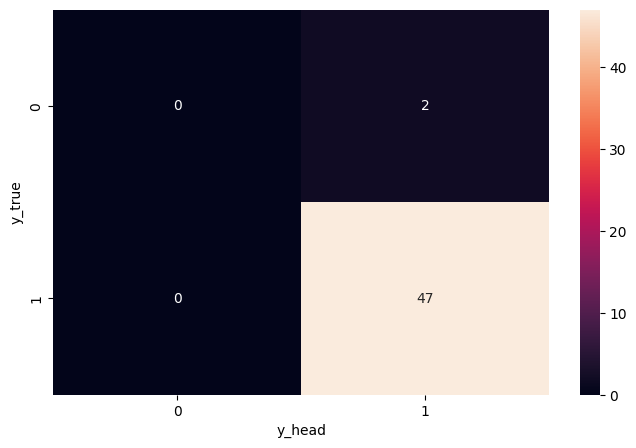

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
pip install pandas wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud

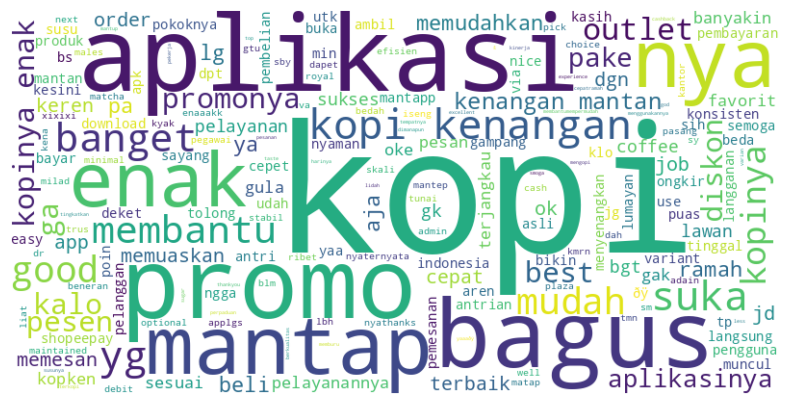

In [ ]:
# Menggabungkan semua teks dalam kolom cleaned_content menjadi satu string
text = " ".join(review for review in df.cleaned_content)

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan wordcloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tidak menampilkan axis
plt.show()